# FeedForward Neural Network with Softmax+CrossEntropy

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dsets
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import numpy as np


In [ ]:
# 1. Hyper Parameter
train_size = 784
num_classes = 10
hidden1_size = 500
learning_rate = 0.001

batch_size = 100
ephoc_size = 5


In [ ]:
# 2. Data load
# MNIST Dataset 
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),  
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# 2-1. 샘플 데이터 확인
print(train_dataset)
# dataset.__getitem__(idx)
image,label = train_dataset.__getitem__(0)
print(image.size(),label)

# dataset[idx]
image,label = train_dataset[0]
print(image.size(),label)
print(image)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()
torch.Size([1, 28, 28]) 5
torch.Size([1, 28, 28]) 5
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.

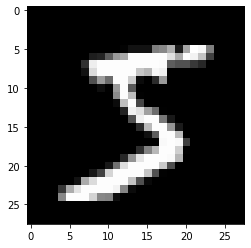

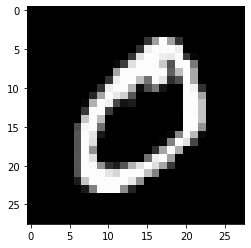

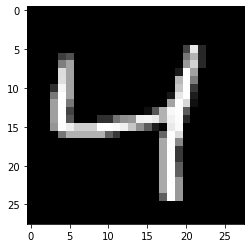

In [ ]:
# 2-2. 샘플 데이터 출력
for i in range(3):
    img= train_dataset[i][0].numpy()
    plt.imshow(img[0],cmap='gray')
    plt.show()

In [ ]:
# 3. Build the Model
class FeedForwardNN(nn.Module):
    def __init__(self, train_size, hidden1_size, num_classes):
        super(FeedForwardNN, self).__init__()

        self.linear1 = nn.Linear(train_size, hidden1_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden1_size, num_classes)
        
    def forward(self, x):
        
        lin1 = self.linear1(x)
        lin1_relu = self.relu(lin1)
        z2 = self.linear2(lin1_relu)
        #z2 = 코드를 작성해 보세요
        
        return z2
        

In [ ]:
# 4. Generate a model
model = FeedForwardNN(train_size, hidden1_size, num_classes) #코드를 작성해 보세요

In [ ]:
# 5. Init loss function and Optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# 6. Train
for ephoc in range(ephoc_size):
    print("ephoc: ",ephoc)
    for idx, (images, labels) in enumerate(train_loader):
        #convert dataset as the Pytorch style
        images = images.view(-1,784)#코드를 작성해 보세요 images.view(?,?) 힌트: W의 갯수와 images의 벡터 사이즈는 같아야 하겠죠? 이때 view함수는 2차원 매트릭스를 1차원으로 변경 가능합니다.
        labels = labels
        
        #Forward, Backward, gradient
        optimizer.zero_grad()
        outputs = model.forward(images) #코드를 작성해 보세요
        loss = loss_function(outputs,labels)
        loss.backward()
        optimizer.step()
        
        if idx%100 == 0:
            print("ephoc[",ephoc,"] \t", "loss:", loss.item())
            

ephoc:  0
ephoc[ 0 ] 	 loss: 2.3177242279052734
ephoc[ 0 ] 	 loss: 0.2150123566389084
ephoc[ 0 ] 	 loss: 0.2703712582588196
ephoc[ 0 ] 	 loss: 0.17486907541751862
ephoc[ 0 ] 	 loss: 0.24772639572620392
ephoc[ 0 ] 	 loss: 0.10215190798044205
ephoc:  1
ephoc[ 1 ] 	 loss: 0.05458392575383186
ephoc[ 1 ] 	 loss: 0.09098230302333832
ephoc[ 1 ] 	 loss: 0.06712041795253754
ephoc[ 1 ] 	 loss: 0.21212296187877655
ephoc[ 1 ] 	 loss: 0.04229181632399559
ephoc[ 1 ] 	 loss: 0.07016151398420334
ephoc:  2
ephoc[ 2 ] 	 loss: 0.1307646781206131
ephoc[ 2 ] 	 loss: 0.04309092462062836
ephoc[ 2 ] 	 loss: 0.13044390082359314
ephoc[ 2 ] 	 loss: 0.040267616510391235
ephoc[ 2 ] 	 loss: 0.05340035259723663
ephoc[ 2 ] 	 loss: 0.03140348568558693
ephoc:  3
ephoc[ 3 ] 	 loss: 0.0625857338309288
ephoc[ 3 ] 	 loss: 0.03902607783675194
ephoc[ 3 ] 	 loss: 0.030615873634815216
ephoc[ 3 ] 	 loss: 0.061509836465120316
ephoc[ 3 ] 	 loss: 0.03789432346820831
ephoc[ 3 ] 	 loss: 0.0770997405052185
ephoc:  4
ephoc[ 4 ] 	 loss

In [ ]:
#Test the model
total = 0
correct = 0
for images, labels in test_loader:
    images = Variable(images.view(-1,28*28))

    outputs = model(images)   
    _, predicted = torch.max(outputs.data, 1)
    total += len(predicted)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 97 %
